# Bike Machine Learning - from scratch

In [426]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [427]:
df = pd.read_csv('Bike.csv')
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


See the correlation between every features

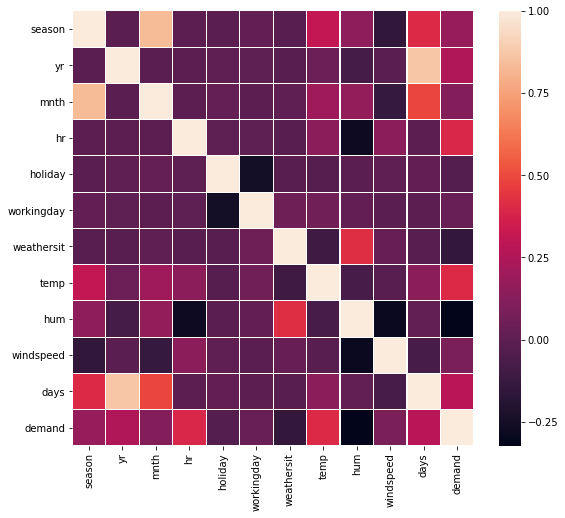

In [428]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, linewidths = 0.1) 

# Implementation of the linear regression

In [447]:
#Implementation of a class to make a linear Regression from scratch

class Regression_Armine:
    def __init__(self):
        self.iterations = 500  #Number of iterations
        self.n = 0             #Number of features
        self.m = 0             #Number of data (rows of the dataset)
        self.alpha = 0.01      #learning rate
       
    def normalise(self):       #Normalise data to make a better prediction
        for i in range(1, self.n + 1):
            self.X[:, i] = (self.X[:, i] - np.mean(self.X[:, i])) / np.std(self.X[:, i])
        self.y = (self.y - np.mean(self.y)) / np.std(self.y)
   
    
    def cal_cost(self, X, y, w):    #Method to compete the cost function 
        residual = self.X.dot(w) - self.y
        X_t = residual.T
        return ((1/2)*self.m)*(X_t).dot(residual)


    def gradient_descent(self, X, y, w):       
        X_t = self.X.transpose()
        residual = self.X.dot(w) - self.y
        return (self.alpha / self.m) * (X_t.dot(residual))
    
    
    def normalEquation(self,X, y):
        w_coef = []                                    #List of the different values of w (minimized values)
        X_transpose = np.transpose(self.X)
        w_coef = np.linalg.inv(X_transpose.dot(self.X))            # Calculating w
        w_coef = w_coef.dot(X_transpose)                            #w = inv(X^T * X) * X^T * y
        w_coef = w_coef.dot(self.y)
        return w_coef
    
    
    def for_loops(self):       #Loop to make a gradient descent 
        cost_plot = []         #List of the different values of the cost function to plot it after
        w_plot = []            #List of the different values of w
        for i in range(self.iterations):
            self.w = self.w - self.gradient_descent(self.X, self.y, self.w)
            new_w = self.w
            w_plot.append(new_w)
            self.w = new_w - ((self.alpha / self.m) * self.X.transpose().dot(self.X.dot(new_w) - self.y))
            cost = self.cal_cost(self.X, self.y, self.w)
            cost = cost.tolist()
            cost_plot.append(cost[0][0])  #[0][0] because cost is an array of array, and we want only the value
            #print(self.w)
        return self.w, w_plot,cost_plot;   #Return Tuples
         
        
    def R_Square(self):               #Compete the R_Square (Quality of prediction)
        y_pred = self.X.dot(self.w)
        ssr = np.sum((y_pred - self.y)**2)
        sst = np.sum((self.y - np.mean(self.y))**2)
        self.r2_score = 1 - (ssr/sst)
        return (self.r2_score)
        
        
    def fit_Gradient_Descent(self, X, y):                #Gradient descent function fitting model
        self.n = len(X[0])
        self.m = len(X)
        self.X = np.insert(X,0,1, axis = 1)
        self.y = y
        self.normalise()
        self.w = np.ones((self.n+1,1))
        coef,w_plot,cost_plot = self.for_loops()
        plt.title('Cost Function J')    #Plot the cost function and see where is the min
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.plot(cost_plot)
        plt.show()
        print("Coefficient of W for the function h(w)")
        print(coef)
        
        
    def fit_NormalEquation(self, X, y):                 #Normal Equation function fitting model
        self.n = len(X[0])
        self.m = len(X)
        self.X = np.insert(X,0,1, axis = 1)
        self.y = y
        self.normalise()
        self.w = np.ones((self.n+1,1))
        coef = self.normalEquation(self.X, self.y)
        print(coef)
            

In [430]:
#One hot encoding for the categorical features
df = pd.get_dummies(df, columns=['holiday','dayOfWeek','mnth','days','yr','weathersit','hr']) 
df.columns

Index(['season', 'workingday', 'temp', 'hum', 'windspeed', 'demand',
       'holiday_0', 'holiday_1', 'dayOfWeek_Fri', 'dayOfWeek_Mon',
       ...
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object', length=782)

In [431]:
#Create X predictors to predict y

y = df[['demand']].to_numpy()
X = df.drop(['demand'], axis=1).to_numpy()

In [432]:
df.head()

,season,workingday,temp,hum,windspeed,demand,holiday_0,holiday_1,dayOfWeek_Fri,dayOfWeek_Mon,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,1,0,0.24,0.81,0.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.22,0.80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.22,0.80,0.0,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0.24,0.75,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0.24,0.75,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [433]:
#Indeed, 782 differents values of w because 782 features
len(df.columns)

782

# Comparison - Gradient Descent VS Normal Equation

Make a Linear Regression with the Gradient Descent with a plot of the cost function

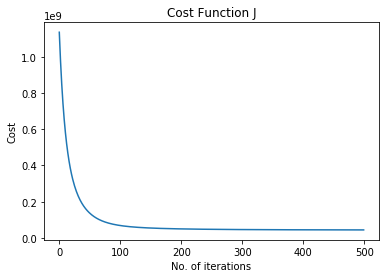

Coefficient of W for the function h(w)
[[4.31712474e-05]
 [6.16090729e-01]
 [5.70925538e-01]
 [7.26290063e-01]
 [7.77894688e-02]
 [3.31079361e-02]
 [9.03993832e-01]
 [1.09600617e+00]
 [8.68362284e-01]
 [8.86857449e-01]
 [1.26131963e+00]
 [1.26138303e+00]
 [9.04200758e-01]
 [9.00631683e-01]
 [9.14349958e-01]
 [1.17947463e+00]
 [1.13893654e+00]
 [1.13591841e+00]
 [1.05853656e+00]
 [1.01862183e+00]
 [9.49481998e-01]
 [8.64537033e-01]
 [8.83682705e-01]
 [9.13001278e-01]
 [9.12453952e-01]
 [9.35528007e-01]
 [1.01651260e+00]
 [1.00615679e+00]
 [1.00495097e+00]
 [1.02695079e+00]
 [1.02347541e+00]
 [1.02356512e+00]
 [1.02657387e+00]
 [1.03515938e+00]
 [1.03694923e+00]
 [1.03283325e+00]
 [1.02954355e+00]
 [1.02470659e+00]
 [1.02547086e+00]
 [1.02949606e+00]
 [1.03275846e+00]
 [1.02315212e+00]
 [1.03199476e+00]
 [1.01710674e+00]
 [1.01003452e+00]
 [1.02050614e+00]
 [1.03347832e+00]
 [1.05258161e+00]
 [1.04382378e+00]
 [1.03879412e+00]
 [1.02505425e+00]
 [1.01473004e+00]
 [1.02646245e+00]
 [1.030

In [434]:
#Make the Linear Regression with the gradient descent
#it show all the values of the different w of the function h(w) = w0 + w1x1 + w2x2... + wnxn

model2 = Regression_Armine()
model2.fit_Gradient_Descent(X, y)

Display the Quality of the model for the Gradient Descent

In [435]:
#Show the quality of prediction of the Gradient descent
model2.R_Square()

0.7050920990131169

Make a Linear Regression with the Gradient Descent with a plot of the cost function

In [436]:
model2.fit_NormalEquation(X, y)

[[ 1.11677416e+04]
 [-5.20331879e+03]
 [ 2.31324023e+19]
 [-2.12833290e+05]
 [-3.31246640e+04]
 [ 2.15843273e+04]
 [-8.85543165e+19]
 [-8.02460227e+19]
 [-1.45109925e+19]
 [-1.44915256e+19]
 [ 2.90582752e+18]
 [ 2.90101302e+18]
 [-1.44720074e+19]
 [-1.44279027e+19]
 [-1.44817729e+19]
 [-4.01233640e+17]
 [-3.89753814e+17]
 [-4.06801684e+17]
 [-4.02254273e+17]
 [-4.08674895e+17]
 [-4.02636054e+17]
 [-4.08674895e+17]
 [-4.07052169e+17]
 [-4.02254273e+17]
 [-4.04031485e+17]
 [-4.02254273e+17]
 [-4.08051879e+17]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.06116875e+14]
 [ 2.0611687

Display the Quality of the model for the Normal Equation

In [437]:
#Show the quality of prediction of the Normal Equation - Negative value....... :( 
model2.R_Square()

-7.122590413505426

# Comparison with Scikit-learn model

In [438]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [439]:
df2 = pd.read_csv('Bike.csv')
df2.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


In [440]:
#One hot encoding
df2 = pd.get_dummies(df2, columns=['holiday','dayOfWeek','mnth','days','yr','weathersit','hr']) 
df2.columns

Index(['season', 'workingday', 'temp', 'hum', 'windspeed', 'demand',
       'holiday_0', 'holiday_1', 'dayOfWeek_Fri', 'dayOfWeek_Mon',
       ...
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object', length=782)

In [441]:
y = df2[['demand']].to_numpy()
X = df2.drop(['demand'], axis=1).to_numpy()

In [442]:
X

array([[1.  , 0.  , 0.24, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.22, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.22, ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 0.26, ..., 1.  , 0.  , 0.  ],
       [1.  , 1.  , 0.26, ..., 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.26, ..., 0.  , 0.  , 1.  ]])

In [443]:
#Create Linear Regression model, and train the algorithm 
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)
reg = lm.fit(X_train,y_train)
lm.fit(X_train,y_train)
y_predictor=reg.predict(X_test)

In [444]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_predictor)
mse = mean_squared_error(y_test, y_predictor)

prediction = lm.predict(X_test)
r2 = r2_score(y_test,prediction)

Display the Quality of the model with Scikit Learn

In [445]:
#Pretty similar than our Gradient Descent score
r2

0.683789004616484

Display the coefficient of the w

In [446]:
lm.intercept_, lm.coef_

(array([-5.34186663e+14]),
 array([[-1.92148281e+01, -4.81123669e+14,  3.65969450e+02,
         -9.70402509e+01, -8.56694406e+00,  1.20247656e+14,
         -3.60876013e+14,  5.17740135e+14,  5.17740135e+14,
          3.66164653e+13,  3.66164653e+13,  5.17740135e+14,
          5.17740135e+14,  5.17740135e+14,  4.06532188e+14,
          4.06532188e+14,  4.06532188e+14,  4.06532188e+14,
          4.06532188e+14,  4.06532188e+14,  4.06532188e+14,
          4.06532188e+14,  4.06532188e+14,  4.06532188e+14,
          4.06532188e+14,  4.06532188e+14,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.31234250e+11,  1.31234250e+11,  1.31234250e+11,
          1.3